## Importation packages

In [183]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import re

## Extraction des données et premières manipulations

On transforme à l'issue de cette partie les données en une grande liste contenant les lignes brutes du json.

In [184]:
# Load JSON data from file
with open('../data/entities.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

In [185]:
len(data)

1218

In [186]:
list(data.values())[0]

'ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise\nⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise\nⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise\nⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise\nⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise\nⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise\nⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise\nⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise\nⓅde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise\nⓄde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise\nⓄde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise\nⓄde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise\nⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise\nⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise\nⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise\nⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme m

In [187]:
def line_to_list(line):
    return(line.split("\n"))

In [188]:
line_to_list(list(data.values())[0])

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [189]:
def json_to_big_list(data):
    concatenated_list = []
    for value in data.values():
        if len(value) >= 1:
            concatenated_list.extend(line_to_list(value))
    return concatenated_list

In [190]:
big_list = json_to_big_list(data)

In [191]:
len(big_list)

25081

In [192]:
for i in range(len(big_list)):
    print(big_list[i])

ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise
ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise
ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise
ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise
ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise
ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise
ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise
ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise
Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise
Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise
Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise
Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise
ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise
ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise
ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise
ⓅGaucheron ⒻJoachim Florentin Ⓜpharmacien Ⓐ30 ⒸHomme marié Ⓚfrançaise
ⓄS

## Transformation de la liste en dataframe

In [193]:
with open("../data/tokens.yml", "r", encoding="utf-8") as f:
    data_token = yaml.safe_load(f)

print(data_token)

{'age': {'start': 'Ⓐ', 'end': ''}, 'birth_date': {'start': 'Ⓑ', 'end': ''}, 'civil_status': {'start': 'Ⓒ', 'end': ''}, 'education_level': {'start': 'Ⓓ', 'end': ''}, 'employer': {'start': 'Ⓔ', 'end': ''}, 'firstname': {'start': 'Ⓕ', 'end': ''}, 'link': {'start': 'Ⓗ', 'end': ''}, 'lob': {'start': 'Ⓘ', 'end': ''}, 'maiden_name': {'start': 'Ⓙ', 'end': ''}, 'nationality': {'start': 'Ⓚ', 'end': ''}, 'observation': {'start': 'Ⓛ', 'end': ''}, 'occupation': {'start': 'Ⓜ', 'end': ''}, 'surname': {'start': 'Ⓞ', 'end': ''}, 'surname_household': {'start': 'Ⓟ', 'end': ''}}


In [194]:
data_category = {
    'age': {'start': 'Ⓐ', 'end': ''},
    'birth_date': {'start': 'Ⓑ', 'end': ''},
    'civil_status': {'start': 'Ⓒ', 'end': ''},
    'education_level': {'start': 'Ⓓ', 'end': ''},
    'employer': {'start': 'Ⓔ', 'end': ''},
    'firstname': {'start': 'Ⓕ', 'end': ''},
    'link': {'start': 'Ⓗ', 'end': ''},
    'lob': {'start': 'Ⓘ', 'end': ''},
    'maiden_name': {'start': 'Ⓙ', 'end': ''},
    'nationality': {'start': 'Ⓚ', 'end': ''},
    'observation': {'start': 'Ⓛ', 'end': ''},
    'occupation': {'start': 'Ⓜ', 'end': ''},
    'surname': {'start': 'Ⓞ', 'end': ''},
    'surname_household': {'start': 'Ⓟ', 'end': ''}
}

# Convert dictionary to DataFrame
df_category = pd.DataFrame(data_category)

In [195]:
[df_category.iat[0,i] for i in range(len(df_category.columns))]

['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

In [196]:
def split_on_letters(string, split_list):
    # Joining the letters in split_list into a regex pattern
    pattern = '|'.join(re.escape(letter) for letter in split_list)
    
    # Splitting the string using the regex pattern
    parts = re.split(pattern, string)
    
    return parts

# Example string
string = "HelloWorld!Howareyou?"

# List of letters to split on
split_list = [df_category.iat[0,i] for i in range(len(df_category.columns))]

# Splitting the string on the letters in split_list
result = split_on_letters(string, split_list)

# Print the result
print(result)

['HelloWorld!Howareyou?']


In [197]:
pd.DataFrame([split_on_letters(line, split_list) for line in big_list])

0                   1            2               3       4  \
0                   Breton      Cyrille       menuisier      25    
1                  Ferazzi      Auguste         vitrier      30    
2                   Machol       Pierre         vitrier      24    
3                  Desbois    Alexandre         prop re      48    
4                   Vignat        Zélie         prop re   sa fe    
...   ..                ...          ...             ...     ...   
25076     Chameton-Dideron        Marie            chef    1869    
25077                  Ode        Marie   ouv chaus res    chef    
25078                Berni        Nello       manoeuvre    chef    
25079        Berni-Laureti   Annunziata          épouse    1887    
25080                Berni        Primo            fils    1914    

                  5            6           7                 8     9  
0           Garçon     française        None              None  None  
1           Garçon   Piémontaise        None              None  None  
2           Garçon   Piémontaise        None              None  None  
3      Homme marié     française        None              None  None  
4               30     française        None              None  None  
...             ...          ...         ...               ...   ...  
25076         idem     Pailharès        None              None  None  
25077         Cara         1863        idem   St Naz en Royans  None  
25078      Baretto         1886   italienne             Castel  None  
25079         idem          idem        None              None  None  
25080         idem          idem        None              None  None  

[25081 rows x 10 columns]

In [198]:
[line for line in big_list]

['ⓄBreton ⒻCyrille Ⓜmenuisier Ⓐ25 ⒸGarçon Ⓚfrançaise',
 'ⓅFerazzi ⒻAuguste Ⓜvitrier Ⓐ30 ⒸGarçon ⓀPiémontaise',
 'ⓅMachol ⒻPierre Ⓜvitrier Ⓐ24 ⒸGarçon ⓀPiémontaise',
 'ⓅDesbois ⒻAlexandre Ⓜprop re Ⓐ48 ⒸHomme marié Ⓚfrançaise',
 'ⓄVignat ⒻZélie Ⓜprop re Ⓗsa fe Ⓐ30 Ⓚfrançaise',
 'ⓄHouy ⒻCaroline Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓄViolet ⒻEsther Ⓜfe de chambre Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅDesbroper ⒻFrançois Jules Ⓜaumônier du collège Ⓐ46 ⒸGarçon Ⓚfrançaise',
 'ⓄApelmeau ⒻThérèse Ⓜdomestique Ⓐ49 ⒸFemme mariée Ⓚfrançaise',
 'Ⓟde Chaumont Ⓐ40 ⒸHomme marié Ⓚfrançaise',
 'Ⓞde Chaumont ⒻMathilde Ⓜprofess Ⓗsa fe Ⓐ30 ⒸFemme mariée Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGeorges Ⓗle fils Ⓐ11 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻHenro Ⓗle fils Ⓐ8 ⒸGarçon Ⓚfrançaise',
 'Ⓞde Chaumont ⒻGaston Ⓗle fils Ⓐ5 ⒸGarçon Ⓚfrançaise',
 'ⓄVoisin ⒻAnne Ⓜdomestique Ⓐ24 ⒸFille Ⓚfrançaise',
 'ⓅAllemant ⒻPhilippe Ⓜtailleur Ⓐ45 ⒸHomme marié Ⓚfrançaise',
 'ⓄDutertre ⒻAdèle Ⓜouvrière Ⓗsa femme Ⓐ45 ⒸFemme mariée Ⓚfrançaise',
 'ⓅG

In [199]:
# List of symbols
symbols = ['Ⓐ', 'Ⓑ', 'Ⓒ', 'Ⓓ', 'Ⓔ', 'Ⓕ', 'Ⓗ', 'Ⓘ', 'Ⓙ', 'Ⓚ', 'Ⓛ', 'Ⓜ', 'Ⓞ', 'Ⓟ']

# Example sentences
sentences = ['ⒻHello ⒺWorld', 'ⒻHow are you?']

def clean_spaces(li):
    for i in range(len(li)-1):
        li[i] = str(li[i])[:-1]
    return li

# Function to create DataFrame
def create_dataframe(sentences, symbols):
    data = []

    for sentence in sentences:
        # Initialize a dictionary for the current sentence
        sentence_dict = {symbol: None for symbol in symbols}

        # Split the sentence based on symbols
        list_words = split_on_letters(sentence, split_list)[1:]
        list_words = clean_spaces(list_words)
        list_symbols = [char for char in sentence if char in symbols]
        print(list_words)
        print(list_symbols)

        for i in range(len(list_symbols)):
            sentence_dict[list_symbols[i]] = list_words[i]

        # Append the dictionary to the data list
        data.append(sentence_dict)

    # Create DataFrame
    df = pd.DataFrame(data)

    return df

# Create DataFrame
df_recensement = create_dataframe(big_list, symbols)

# Print DataFrame
df_recensement

['Breton', 'Cyrille', 'menuisier', '25', 'Garçon', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Ferazzi', 'Auguste', 'vitrier', '30', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Machol', 'Pierre', 'vitrier', '24', 'Garçon', 'Piémontaise']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbois', 'Alexandre', 'prop re', '48', 'Homme marié', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Vignat', 'Zélie', 'prop re', 'sa fe', '30', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓗ', 'Ⓐ', 'Ⓚ']
['Houy', 'Caroline', 'domestique', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Violet', 'Esther', 'fe de chambre', '24', 'Fille', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Desbroper', 'François Jules', 'aumônier du collège', '46', 'Garçon', 'française']
['Ⓟ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['Apelmeau', 'Thérèse', 'domestique', '49', 'Femme mariée', 'française']
['Ⓞ', 'Ⓕ', 'Ⓜ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', '40', 'Homme marié', 'française']
['Ⓟ', 'Ⓐ', 'Ⓒ', 'Ⓚ']
['de Chaumont', 'Mathilde', 'profess', 'sa 

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [200]:
data_category.keys()

dict_keys(['age', 'birth_date', 'civil_status', 'education_level', 'employer', 'firstname', 'link', 'lob', 'maiden_name', 'nationality', 'observation', 'occupation', 'surname', 'surname_household'])

In [201]:
df_category

age birth_date civil_status education_level employer firstname link lob  \
start   Ⓐ          Ⓑ            Ⓒ               Ⓓ        Ⓔ         Ⓕ    Ⓗ   Ⓘ   
end                                                                             

      maiden_name nationality observation occupation surname surname_household  
start           Ⓙ           Ⓚ           Ⓛ          Ⓜ       Ⓞ                 Ⓟ  
end

In [202]:
df_recensement

Ⓐ     Ⓑ            Ⓒ     Ⓓ        Ⓔ           Ⓕ       Ⓗ  \
0        25  None       Garçon  None     None     Cyrille    None   
1        30  None       Garçon  None     None     Auguste    None   
2        24  None       Garçon  None     None      Pierre    None   
3        48  None  Homme marié  None     None   Alexandre    None   
4        30  None         None  None     None       Zélie   sa fe   
...     ...   ...          ...   ...      ...         ...     ...   
25076  None  1869         None  None     None       Marie    chef   
25077  None  1863         None  None     Cara       Marie    chef   
25078  None  1886         None  None  Baretto       Nello    chef   
25079  None  1887         None  None     None  Annunziata  épouse   
25080  None  1914         None  None     None       Primo    fils   

                      Ⓘ     Ⓙ            Ⓚ     Ⓛ              Ⓜ  \
0                  None  None    française  None      menuisier   
1                  None  None  Piémontaise  None        vitrier   
2                  None  None  Piémontaise  None        vitrier   
3                  None  None    française  None        prop re   
4                  None  None    française  None        prop re   
...                 ...   ...          ...   ...            ...   
25076         Pailharès  None         idem  None           None   
25077  St Naz en Royans  None         idem  None  ouv chaus res   
25078            Castel  None    italienne  None      manoeuvre   
25079              idem  None         idem  None           None   
25080              idem  None         idem  None           None   

                   Ⓞ                 Ⓟ  
0             Breton              None  
1               None           Ferazzi  
2               None            Machol  
3               None           Desbois  
4             Vignat              None  
...              ...               ...  
25076           None  Chameton-Dideron  
25077           None               Ode  
25078           None             Berni  
25079  Berni-Laureti              None  
25080          Berni              None  

[25081 rows x 14 columns]

In [203]:
dict(zip(df_recensement.columns, data_category.keys()))

{'Ⓐ': 'age',
 'Ⓑ': 'birth_date',
 'Ⓒ': 'civil_status',
 'Ⓓ': 'education_level',
 'Ⓔ': 'employer',
 'Ⓕ': 'firstname',
 'Ⓗ': 'link',
 'Ⓘ': 'lob',
 'Ⓙ': 'maiden_name',
 'Ⓚ': 'nationality',
 'Ⓛ': 'observation',
 'Ⓜ': 'occupation',
 'Ⓞ': 'surname',
 'Ⓟ': 'surname_household'}

In [204]:
df_recensement = df_recensement.rename(columns=dict(zip(df_recensement.columns, data_category.keys())))

#### Remplacement des idems

In [210]:
df_recensement.to_csv("../data_cleaned/df_recensement.csv")

## Transformation des champs textuels

In [120]:
df_recensement["target"] = df_recensement["link"].apply(lambda x: 1 if x == 'chef' else 0)

In [121]:
df_recensement

age birth_date civil_status education_level employer   firstname  \
0        25       None       Garçon            None     None     Cyrille   
1        30       None       Garçon            None     None     Auguste   
2        24       None       Garçon            None     None      Pierre   
3        48       None  Homme marié            None     None   Alexandre   
4        30       None         None            None     None       Zélie   
...     ...        ...          ...             ...      ...         ...   
25076  None       1869         None            None     None       Marie   
25077  None       1863         None            None     Cara       Marie   
25078  None       1886         None            None  Baretto       Nello   
25079  None       1887         None            None     None  Annunziata   
25080  None       1914         None            None     None       Primo   

         link               lob maiden_name  nationality observation  \
0        None              None        None    française        None   
1        None              None        None  Piémontaise        None   
2        None              None        None  Piémontaise        None   
3        None              None        None    française        None   
4       sa fe              None        None    française        None   
...       ...               ...         ...          ...         ...   
25076    chef         Pailharès        None         idem        None   
25077    chef  St Naz en Royans        None         idem        None   
25078    chef            Castel        None    italienne        None   
25079  épouse              idem        None         idem        None   
25080    fils              idem        None         idem        None   

          occupation        surname surname_household  target  
0          menuisier         Breton              None       0  
1            vitrier           None           Ferazzi       0  
2            vitrier           None            Machol       0  
3            prop re           None           Desbois       0  
4            prop re         Vignat              None       0  
...              ...            ...               ...     ...  
25076           None           None  Chameton-Dideron       1  
25077  ouv chaus res           None               Ode       1  
25078      manoeuvre           None             Berni       1  
25079           None  Berni-Laureti              None       0  
25080           None          Berni              None       0  

[25081 rows x 15 columns]

On veut prédire le fait d'être le chef de famille (variable binaire) à partir des autres champs.

In [122]:
df_recensement.nunique()

age                   253
birth_date            158
civil_status            6
education_level         0
employer             1087
firstname            2456
link                  937
lob                  2923
maiden_name             0
nationality            73
observation           310
occupation           2056
surname              8120
surname_household    4126
target                  2
dtype: int64

#### Equilibrage du dataframe

In [123]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 3022
Nombre total de personnes : 25081


In [125]:
column_name = 'target'
num_rows_to_remove = len(df_recensement["target"]) - 2*df_recensement["target"].sum()

# Filter rows where column contains 0
zero_rows = df_recensement[df_recensement[column_name] == 0]

# Randomly select rows to remove
rows_to_remove = zero_rows.sample(n=num_rows_to_remove).index

# Remove selected rows
df_recensement = df_recensement.drop(rows_to_remove)

df_recensement.reset_index(inplace=True)

In [126]:
print(f"Nombre de chef de famille : {df_recensement["target"].sum()}")
print(f"Nombre total de personnes : {len(df_recensement["target"])}")

Nombre de chef de famille : 3022
Nombre total de personnes : 6044


In [127]:
df_recensement.head()

index age birth_date  civil_status education_level employer  \
0      0  25       None        Garçon            None     None   
1      3  48       None   Homme marié            None     None   
2      7  46       None        Garçon            None     None   
3     10  30       None  Femme mariée            None     None   
4     20  22       None        Garçon            None     None   

        firstname   link   lob maiden_name nationality observation  \
0         Cyrille   None  None        None   française        None   
1       Alexandre   None  None        None   française        None   
2  François Jules   None  None        None   française        None   
3        Mathilde  sa fe  None        None   française        None   
4     Jean Pierre   None  None        None   française        None   

            occupation      surname surname_household  target  
0            menuisier       Breton              None       0  
1              prop re         None           Desbois       0  
2  aumônier du collège         None         Desbroper       0  
3              profess  de Chaumont              None       0  
4   élève en pharmacie     Grofrard              None       0

#### Transformation de la colonne nom en une valeur quantitative

In [128]:
firstname_with_sex = pd.read_csv("../data/firstname_with_sex.csv", sep=";")

In [129]:
firstname_with_sex

firstname     male   female
0        marie    10145  2390322
1         jean  1869615     6476
2       pierre  1475841     5047
3       jeanne     1765  1097397
4     françois  1089009     5951
...        ...      ...      ...
6941   winnocq       10        0
6942     xyste        9        1
6943      zara        0       10
6944  zéraphin       10        0
6945     zimle        0       10

[6946 rows x 3 columns]

In [154]:
def from_name_to_value(x):
    if x is None or len(x) == 0:
        return 0
    else:
        x_first_lowcase = x.split()[0].lower()
        if firstname_with_sex[firstname_with_sex["firstname"] == x_first_lowcase].empty:
            return 0
        else:
            return np.arcsin((firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        - firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0]) /
        (firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "male"].iloc[0] 
        + firstname_with_sex.loc[firstname_with_sex["firstname"] == x_first_lowcase, "female"].iloc[0])
        ) / np.pi
        #J'utilise ici arcsin pour éclater mes valeurs qui sont très proches de -1 et 1 pour mieux voir ce qui se passe
        #probablement mieux aussi pour certains modèles

df_recensement["value_name"] = df_recensement["firstname"].apply(from_name_to_value)

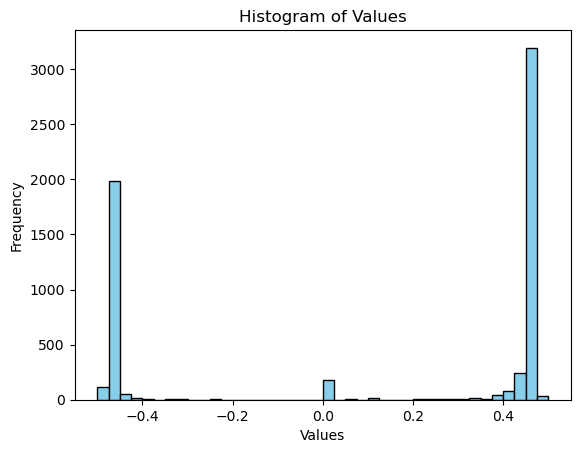

In [158]:
df_recensement["value_name"]

plt.hist(df_recensement["value_name"], bins=40, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

# Show plot
plt.show()

In [159]:
df_recensement.head()

index age birth_date  civil_status education_level employer  \
0      0  25       None        Garçon            None     None   
1      3  48       None   Homme marié            None     None   
2      7  46       None        Garçon            None     None   
3     10  30       None  Femme mariée            None     None   
4     20  22       None        Garçon            None     None   

        firstname   link   lob maiden_name nationality observation  \
0         Cyrille   None  None        None   française        None   
1       Alexandre   None  None        None   française        None   
2  François Jules   None  None        None   française        None   
3        Mathilde  sa fe  None        None   française        None   
4     Jean Pierre   None  None        None   française        None   

            occupation      surname surname_household  target  value_name  
0            menuisier       Breton              None       0    0.377003  
1              prop re         None           Desbois       0    0.456997  
2  aumônier du collège         None         Desbroper       0    0.453025  
3              profess  de Chaumont              None       0   -0.469543  
4   élève en pharmacie     Grofrard              None       0    0.462575

#### Transformation de la variable civil_status en variable catégorielle

In [160]:
df_recensement["civil_status"].unique()

array(['Garçon', 'Homme marié', 'Femme mariée', 'Fille', None, 'Veuf',
       'Veuve'], dtype=object)

In [169]:
def sex_from_civil_status(x):
    if x is None:
        return 0
    elif x == "Garçon" or x == "Homme marié" or x == "Veuf":
        return 1
    else:
        return -1

df_recensement["sex_from_civil_status"] = df_recensement["civil_status"].apply(sex_from_civil_status)

In [170]:
df_recensement.groupby("sex_from_civil_status").count()

index   age  birth_date  civil_status  education_level  \
sex_from_civil_status                                                           
-1                       743   658           6           743                0   
 0                      4512  2031        2452             0                0   
 1                       789   702           4           789                0   

                       employer  firstname  link   lob  maiden_name  \
sex_from_civil_status                                                 
-1                            1        736   539    99            0   
 0                         1398       4498  4468  2519            0   
 1                            1        784   452   140            0   

                       nationality  observation  occupation  surname  \
sex_from_civil_status                                                  
-1                              87           23         195      693   
 0                            3934           85        4047     1863   
 1                             112           21         468      507   

                       surname_household  target  value_name  
sex_from_civil_status                                         
-1                                    39     743         743  
 0                                  2612    4512        4512  
 1                                   282     789         789

In [173]:
df_recensement["widow_encoding"] = df_recensement["civil_status"].apply(lambda x:1 if x == "Veuve" else 0)

#### Visualisation de nos variables explicatives par rapport au target

C:\Users\Serv3\AppData\Local\Temp\ipykernel_25188\2648289391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))


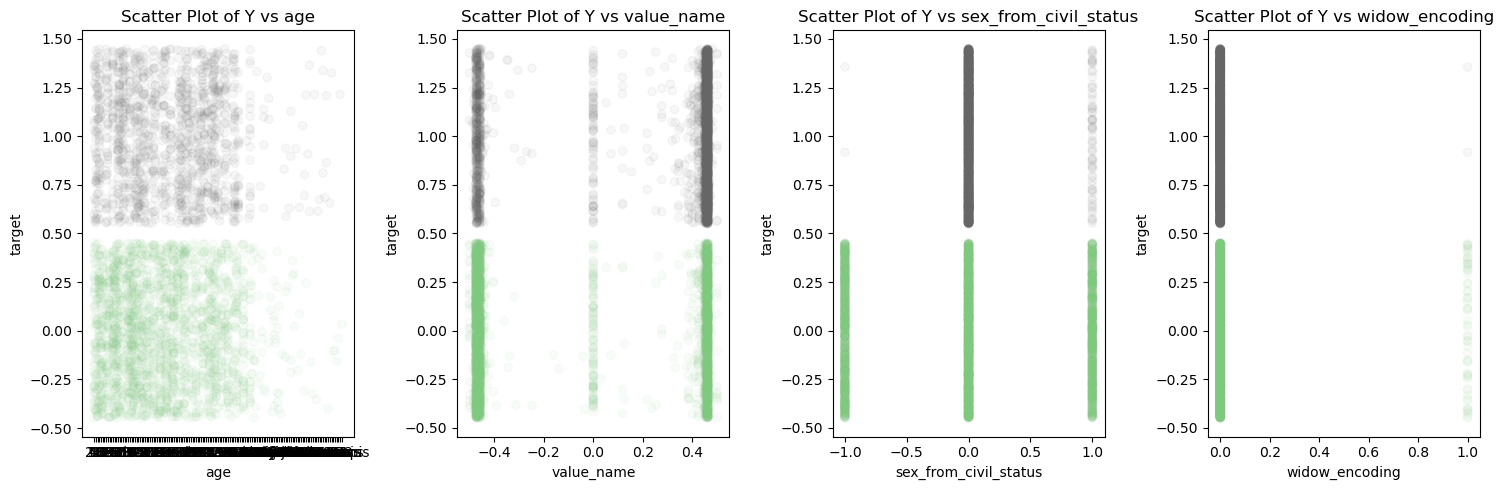

In [174]:
df_sub = df_recensement[["age", "value_name", "sex_from_civil_status", "widow_encoding", "target"]]

# J'écarte ici les valeurs de l'indicatrice "être un chef de famille" afin de mieux voir les graphes
df_sub["target_blurred"] = df_sub["target"] + np.random.uniform(low=-0.45, high=0.45, size=len(df_sub['target']))

fig, axes = plt.subplots(nrows=1, ncols=len(df_sub.columns) - 2, figsize=(15, 5))

# Iterate over each column
for i, column in enumerate(df_sub.columns[:-2]):  # Exclude the last column 'Y'
    # Filter out rows with NaN values in the current column
    filtered_df = df_sub.dropna(subset=[column])
    
    # Create scatter plot for current column against 'Y'
    axes[i].scatter(filtered_df[column], filtered_df["target_blurred"], c=filtered_df['target'], cmap='Accent', alpha=0.05)
    
    # Set title for each subplot
    axes[i].set_title('Scatter Plot of Y vs {}'.format(column))
    
    # Set labels for each subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('target')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## Modélisation

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Charger les données à partir d'un DataFrame pandas
# Assumons que vous avez déjà un DataFrame pandas appelé 'data'
# Assurez-vous que votre DataFrame 'data' contient les fonctionnalités (features) et la variable cible (target) sous forme de colonnes.

# Diviser les données en ensembles d'entraînement et de test
X = df_recensement.drop('target', axis=1)  # Features
y = df_recensement['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un pipeline avec un scaler et le modèle XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

# Effectuer une validation croisée sur le pipeline
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Entraîner le modèle sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher les scores de validation croisée
print("Cross-validation scores:", scores)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\preprocessing\_data.py", line 837, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\preprocessing\_data.py", line 873, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 604, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '15 mois'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\preprocessing\_data.py", line 837, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\preprocessing\_data.py", line 873, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\base.py", line 604, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\validation.py", line 917, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Serv3\Programmes_serv3\Anaconda\envs\nlp_course\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2 mois'
